<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.03548


0:	learn: 0.9728734	total: 67.1ms	remaining: 1m 7s
1:	learn: 0.9505047	total: 70.2ms	remaining: 35s
2:	learn: 0.9285067	total: 75ms	remaining: 24.9s
3:	learn: 0.9115131	total: 80ms	remaining: 19.9s
4:	learn: 0.8932059	total: 82.6ms	remaining: 16.4s
5:	learn: 0.8753663	total: 85.4ms	remaining: 14.2s
6:	learn: 0.8590704	total: 87.7ms	remaining: 12.4s
7:	learn: 0.8417325	total: 89.8ms	remaining: 11.1s
8:	learn: 0.8260189	total: 91.7ms	remaining: 10.1s
9:	learn: 0.8099349	total: 93.8ms	remaining: 9.29s
10:	learn: 0.7957904	total: 95.8ms	remaining: 8.61s
11:	learn: 0.7813554	total: 98ms	remaining: 8.07s
12:	learn: 0.7654130	total: 100ms	remaining: 7.62s
13:	learn: 0.7498762	total: 103ms	remaining: 7.25s
14:	learn: 0.7375270	total: 104ms	remaining: 6.84s
15:	learn: 0.7236087	total: 106ms	remaining: 6.55s
16:	learn: 0.7110365	total: 109ms	remaining: 6.3s
17:	learn: 0.6979871	total: 111ms	remaining: 6.07s
18:	learn: 0.6851912	total: 114ms	remaining: 5.86s
19:	learn: 0.6725685	total: 116ms	rema

48:	learn: 0.4500461	total: 185ms	remaining: 3.6s
49:	learn: 0.4457347	total: 188ms	remaining: 3.56s
50:	learn: 0.4407163	total: 192ms	remaining: 3.56s
51:	learn: 0.4350409	total: 194ms	remaining: 3.54s
52:	learn: 0.4294605	total: 196ms	remaining: 3.51s
53:	learn: 0.4266776	total: 198ms	remaining: 3.46s
54:	learn: 0.4222674	total: 200ms	remaining: 3.44s
55:	learn: 0.4185832	total: 202ms	remaining: 3.41s
56:	learn: 0.4151879	total: 205ms	remaining: 3.38s
57:	learn: 0.4108662	total: 207ms	remaining: 3.36s
58:	learn: 0.4076132	total: 209ms	remaining: 3.34s
59:	learn: 0.4041643	total: 212ms	remaining: 3.32s
60:	learn: 0.4006282	total: 214ms	remaining: 3.3s
61:	learn: 0.3974100	total: 217ms	remaining: 3.28s
62:	learn: 0.3947542	total: 219ms	remaining: 3.26s
63:	learn: 0.3913826	total: 222ms	remaining: 3.24s
64:	learn: 0.3889623	total: 224ms	remaining: 3.23s
65:	learn: 0.3854018	total: 227ms	remaining: 3.21s
66:	learn: 0.3827634	total: 230ms	remaining: 3.2s
67:	learn: 0.3798198	total: 232ms	

72:	learn: 0.3654539	total: 245ms	remaining: 3.11s
73:	learn: 0.3624255	total: 248ms	remaining: 3.11s
74:	learn: 0.3600957	total: 251ms	remaining: 3.09s
75:	learn: 0.3576929	total: 254ms	remaining: 3.08s
76:	learn: 0.3542662	total: 256ms	remaining: 3.07s
77:	learn: 0.3519541	total: 258ms	remaining: 3.05s
78:	learn: 0.3502286	total: 261ms	remaining: 3.04s
79:	learn: 0.3471885	total: 262ms	remaining: 3.02s
80:	learn: 0.3445311	total: 265ms	remaining: 3s
81:	learn: 0.3416883	total: 267ms	remaining: 2.99s
82:	learn: 0.3395061	total: 269ms	remaining: 2.98s
83:	learn: 0.3377225	total: 273ms	remaining: 2.98s
84:	learn: 0.3356035	total: 275ms	remaining: 2.96s
85:	learn: 0.3333265	total: 278ms	remaining: 2.95s
86:	learn: 0.3312336	total: 279ms	remaining: 2.93s
87:	learn: 0.3288735	total: 282ms	remaining: 2.92s
88:	learn: 0.3266125	total: 284ms	remaining: 2.91s
89:	learn: 0.3249841	total: 287ms	remaining: 2.9s
90:	learn: 0.3223040	total: 289ms	remaining: 2.89s
91:	learn: 0.3207881	total: 292ms	r

113:	learn: 0.2892844	total: 367ms	remaining: 2.85s
114:	learn: 0.2881152	total: 371ms	remaining: 2.85s
115:	learn: 0.2865261	total: 373ms	remaining: 2.84s
116:	learn: 0.2854104	total: 375ms	remaining: 2.83s
117:	learn: 0.2842894	total: 377ms	remaining: 2.82s
118:	learn: 0.2828490	total: 380ms	remaining: 2.81s
119:	learn: 0.2821968	total: 382ms	remaining: 2.8s
120:	learn: 0.2808261	total: 385ms	remaining: 2.79s
121:	learn: 0.2801086	total: 387ms	remaining: 2.78s
122:	learn: 0.2789744	total: 389ms	remaining: 2.77s
123:	learn: 0.2780621	total: 391ms	remaining: 2.76s
124:	learn: 0.2764646	total: 394ms	remaining: 2.76s
125:	learn: 0.2753507	total: 399ms	remaining: 2.76s
126:	learn: 0.2738512	total: 402ms	remaining: 2.77s
127:	learn: 0.2728666	total: 408ms	remaining: 2.78s
128:	learn: 0.2716758	total: 410ms	remaining: 2.77s
129:	learn: 0.2707194	total: 412ms	remaining: 2.75s
130:	learn: 0.2697281	total: 416ms	remaining: 2.76s
131:	learn: 0.2689917	total: 418ms	remaining: 2.75s


132:	learn: 0.2679752	total: 421ms	remaining: 2.74s
133:	learn: 0.2666326	total: 423ms	remaining: 2.73s
134:	learn: 0.2659294	total: 425ms	remaining: 2.73s
135:	learn: 0.2650567	total: 428ms	remaining: 2.72s
136:	learn: 0.2635329	total: 430ms	remaining: 2.71s
137:	learn: 0.2627966	total: 433ms	remaining: 2.7s
138:	learn: 0.2617116	total: 437ms	remaining: 2.71s
139:	learn: 0.2608395	total: 439ms	remaining: 2.7s
140:	learn: 0.2597666	total: 442ms	remaining: 2.69s
141:	learn: 0.2585299	total: 444ms	remaining: 2.69s
142:	learn: 0.2573948	total: 447ms	remaining: 2.68s
143:	learn: 0.2563571	total: 450ms	remaining: 2.67s
144:	learn: 0.2558219	total: 453ms	remaining: 2.67s
145:	learn: 0.2545532	total: 455ms	remaining: 2.66s
146:	learn: 0.2542415	total: 457ms	remaining: 2.65s
147:	learn: 0.2533123	total: 460ms	remaining: 2.65s
148:	learn: 0.2527633	total: 462ms	remaining: 2.64s
149:	learn: 0.2523487	total: 464ms	remaining: 2.63s
150:	learn: 0.2511311	total: 467ms	remaining: 2.63s
151:	learn: 0.

180:	learn: 0.2326496	total: 538ms	remaining: 2.43s
181:	learn: 0.2315699	total: 540ms	remaining: 2.43s
182:	learn: 0.2311426	total: 542ms	remaining: 2.42s
183:	learn: 0.2302490	total: 545ms	remaining: 2.42s
184:	learn: 0.2296808	total: 548ms	remaining: 2.41s
185:	learn: 0.2290233	total: 550ms	remaining: 2.4s
186:	learn: 0.2280593	total: 552ms	remaining: 2.4s
187:	learn: 0.2275881	total: 555ms	remaining: 2.4s
188:	learn: 0.2271208	total: 557ms	remaining: 2.39s
189:	learn: 0.2265967	total: 560ms	remaining: 2.38s
190:	learn: 0.2260949	total: 562ms	remaining: 2.38s
191:	learn: 0.2258219	total: 565ms	remaining: 2.38s
192:	learn: 0.2248667	total: 567ms	remaining: 2.37s
193:	learn: 0.2243872	total: 572ms	remaining: 2.38s
194:	learn: 0.2240123	total: 576ms	remaining: 2.38s


195:	learn: 0.2234080	total: 627ms	remaining: 2.57s
196:	learn: 0.2229879	total: 649ms	remaining: 2.64s
197:	learn: 0.2221795	total: 651ms	remaining: 2.64s
198:	learn: 0.2216325	total: 654ms	remaining: 2.63s
199:	learn: 0.2211183	total: 664ms	remaining: 2.66s
200:	learn: 0.2203854	total: 678ms	remaining: 2.69s
201:	learn: 0.2198048	total: 683ms	remaining: 2.7s
202:	learn: 0.2192931	total: 686ms	remaining: 2.69s
203:	learn: 0.2186155	total: 688ms	remaining: 2.68s
204:	learn: 0.2178565	total: 691ms	remaining: 2.68s
205:	learn: 0.2171947	total: 694ms	remaining: 2.67s
206:	learn: 0.2166766	total: 697ms	remaining: 2.67s
207:	learn: 0.2162783	total: 700ms	remaining: 2.66s
208:	learn: 0.2157972	total: 702ms	remaining: 2.66s
209:	learn: 0.2151502	total: 705ms	remaining: 2.65s


210:	learn: 0.2146030	total: 710ms	remaining: 2.65s
211:	learn: 0.2139649	total: 715ms	remaining: 2.66s
212:	learn: 0.2128590	total: 718ms	remaining: 2.65s
213:	learn: 0.2121446	total: 721ms	remaining: 2.65s
214:	learn: 0.2118741	total: 723ms	remaining: 2.64s
215:	learn: 0.2115511	total: 726ms	remaining: 2.63s
216:	learn: 0.2109284	total: 728ms	remaining: 2.63s
217:	learn: 0.2104992	total: 731ms	remaining: 2.62s
218:	learn: 0.2099404	total: 734ms	remaining: 2.62s
219:	learn: 0.2095100	total: 738ms	remaining: 2.62s
220:	learn: 0.2089368	total: 741ms	remaining: 2.61s
221:	learn: 0.2086774	total: 744ms	remaining: 2.61s
222:	learn: 0.2083248	total: 747ms	remaining: 2.6s
223:	learn: 0.2077339	total: 749ms	remaining: 2.59s


224:	learn: 0.2073862	total: 751ms	remaining: 2.59s
225:	learn: 0.2071326	total: 755ms	remaining: 2.59s
226:	learn: 0.2069824	total: 758ms	remaining: 2.58s
227:	learn: 0.2062122	total: 760ms	remaining: 2.57s
228:	learn: 0.2060842	total: 762ms	remaining: 2.57s
229:	learn: 0.2058353	total: 765ms	remaining: 2.56s
230:	learn: 0.2053070	total: 768ms	remaining: 2.56s
231:	learn: 0.2048923	total: 770ms	remaining: 2.55s
232:	learn: 0.2047970	total: 772ms	remaining: 2.54s
233:	learn: 0.2040113	total: 775ms	remaining: 2.54s
234:	learn: 0.2033836	total: 778ms	remaining: 2.53s
235:	learn: 0.2026818	total: 781ms	remaining: 2.53s
236:	learn: 0.2021774	total: 783ms	remaining: 2.52s
237:	learn: 0.2020295	total: 786ms	remaining: 2.52s
238:	learn: 0.2014009	total: 788ms	remaining: 2.51s
239:	learn: 0.2012001	total: 791ms	remaining: 2.5s
240:	learn: 0.2009858	total: 793ms	remaining: 2.5s
241:	learn: 0.2008310	total: 796ms	remaining: 2.49s
242:	learn: 0.2002414	total: 798ms	remaining: 2.49s
243:	learn: 0.

258:	learn: 0.1928833	total: 836ms	remaining: 2.39s
259:	learn: 0.1923903	total: 839ms	remaining: 2.39s
260:	learn: 0.1917452	total: 841ms	remaining: 2.38s
261:	learn: 0.1912255	total: 843ms	remaining: 2.38s
262:	learn: 0.1911107	total: 845ms	remaining: 2.37s
263:	learn: 0.1904115	total: 847ms	remaining: 2.36s
264:	learn: 0.1902948	total: 850ms	remaining: 2.36s
265:	learn: 0.1897653	total: 852ms	remaining: 2.35s
266:	learn: 0.1892998	total: 855ms	remaining: 2.35s
267:	learn: 0.1889566	total: 857ms	remaining: 2.34s
268:	learn: 0.1884686	total: 861ms	remaining: 2.34s
269:	learn: 0.1881278	total: 865ms	remaining: 2.34s
270:	learn: 0.1876059	total: 870ms	remaining: 2.34s
271:	learn: 0.1871928	total: 872ms	remaining: 2.33s
272:	learn: 0.1870957	total: 875ms	remaining: 2.33s
273:	learn: 0.1866255	total: 877ms	remaining: 2.32s
274:	learn: 0.1861481	total: 879ms	remaining: 2.32s
275:	learn: 0.1856377	total: 882ms	remaining: 2.31s
276:	learn: 0.1855152	total: 884ms	remaining: 2.31s
277:	learn: 

289:	learn: 0.1817732	total: 919ms	remaining: 2.25s
290:	learn: 0.1816064	total: 921ms	remaining: 2.24s
291:	learn: 0.1812042	total: 923ms	remaining: 2.24s
292:	learn: 0.1807861	total: 926ms	remaining: 2.23s
293:	learn: 0.1801491	total: 928ms	remaining: 2.23s
294:	learn: 0.1800514	total: 931ms	remaining: 2.22s
295:	learn: 0.1794943	total: 933ms	remaining: 2.22s
296:	learn: 0.1793325	total: 936ms	remaining: 2.21s
297:	learn: 0.1790650	total: 938ms	remaining: 2.21s
298:	learn: 0.1790070	total: 941ms	remaining: 2.21s
299:	learn: 0.1783975	total: 944ms	remaining: 2.2s
300:	learn: 0.1782279	total: 947ms	remaining: 2.2s
301:	learn: 0.1778182	total: 949ms	remaining: 2.19s
302:	learn: 0.1775359	total: 952ms	remaining: 2.19s
303:	learn: 0.1773106	total: 954ms	remaining: 2.18s
304:	learn: 0.1769507	total: 956ms	remaining: 2.18s
305:	learn: 0.1763534	total: 959ms	remaining: 2.17s
306:	learn: 0.1757498	total: 961ms	remaining: 2.17s
307:	learn: 0.1751459	total: 964ms	remaining: 2.17s
308:	learn: 0.

321:	learn: 0.1711808	total: 1.02s	remaining: 2.16s
322:	learn: 0.1706897	total: 1.03s	remaining: 2.16s
323:	learn: 0.1703964	total: 1.03s	remaining: 2.16s
324:	learn: 0.1700920	total: 1.04s	remaining: 2.16s
325:	learn: 0.1700197	total: 1.04s	remaining: 2.16s
326:	learn: 0.1696924	total: 1.05s	remaining: 2.15s
327:	learn: 0.1696439	total: 1.05s	remaining: 2.15s
328:	learn: 0.1695970	total: 1.05s	remaining: 2.15s
329:	learn: 0.1691452	total: 1.06s	remaining: 2.16s
330:	learn: 0.1688938	total: 1.07s	remaining: 2.16s
331:	learn: 0.1685358	total: 1.07s	remaining: 2.16s
332:	learn: 0.1684873	total: 1.08s	remaining: 2.16s
333:	learn: 0.1683861	total: 1.08s	remaining: 2.16s


334:	learn: 0.1679481	total: 1.09s	remaining: 2.17s
335:	learn: 0.1674575	total: 1.09s	remaining: 2.17s
336:	learn: 0.1670355	total: 1.12s	remaining: 2.2s
337:	learn: 0.1664943	total: 1.13s	remaining: 2.22s
338:	learn: 0.1658825	total: 1.14s	remaining: 2.22s
339:	learn: 0.1654733	total: 1.15s	remaining: 2.22s
340:	learn: 0.1652713	total: 1.17s	remaining: 2.26s


341:	learn: 0.1648238	total: 1.18s	remaining: 2.28s
342:	learn: 0.1647119	total: 1.19s	remaining: 2.27s
343:	learn: 0.1641801	total: 1.19s	remaining: 2.27s
344:	learn: 0.1638883	total: 1.21s	remaining: 2.29s
345:	learn: 0.1632982	total: 1.23s	remaining: 2.31s


346:	learn: 0.1629873	total: 1.23s	remaining: 2.31s
347:	learn: 0.1626355	total: 1.23s	remaining: 2.31s
348:	learn: 0.1625957	total: 1.24s	remaining: 2.31s
349:	learn: 0.1622889	total: 1.24s	remaining: 2.31s
350:	learn: 0.1622474	total: 1.25s	remaining: 2.3s
351:	learn: 0.1618981	total: 1.25s	remaining: 2.31s
352:	learn: 0.1613431	total: 1.26s	remaining: 2.31s
353:	learn: 0.1609790	total: 1.26s	remaining: 2.3s
354:	learn: 0.1604748	total: 1.27s	remaining: 2.3s
355:	learn: 0.1602938	total: 1.27s	remaining: 2.3s
356:	learn: 0.1598502	total: 1.27s	remaining: 2.29s
357:	learn: 0.1598038	total: 1.28s	remaining: 2.3s
358:	learn: 0.1594522	total: 1.28s	remaining: 2.29s
359:	learn: 0.1590902	total: 1.29s	remaining: 2.29s
360:	learn: 0.1586797	total: 1.29s	remaining: 2.28s
361:	learn: 0.1583431	total: 1.3s	remaining: 2.29s
362:	learn: 0.1581962	total: 1.31s	remaining: 2.29s
363:	learn: 0.1581618	total: 1.31s	remaining: 2.29s
364:	learn: 0.1578844	total: 1.31s	remaining: 2.28s
365:	learn: 0.1575

366:	learn: 0.1571714	total: 1.32s	remaining: 2.29s
367:	learn: 0.1570578	total: 1.33s	remaining: 2.28s
368:	learn: 0.1568383	total: 1.33s	remaining: 2.28s
369:	learn: 0.1565340	total: 1.33s	remaining: 2.27s
370:	learn: 0.1562229	total: 1.34s	remaining: 2.27s
371:	learn: 0.1558909	total: 1.34s	remaining: 2.27s
372:	learn: 0.1555514	total: 1.35s	remaining: 2.27s
373:	learn: 0.1552713	total: 1.35s	remaining: 2.27s
374:	learn: 0.1548339	total: 1.36s	remaining: 2.27s
375:	learn: 0.1544483	total: 1.36s	remaining: 2.27s
376:	learn: 0.1542274	total: 1.37s	remaining: 2.26s
377:	learn: 0.1539089	total: 1.37s	remaining: 2.26s
378:	learn: 0.1535932	total: 1.38s	remaining: 2.25s


379:	learn: 0.1532833	total: 1.39s	remaining: 2.27s
380:	learn: 0.1532378	total: 1.4s	remaining: 2.27s
381:	learn: 0.1529155	total: 1.4s	remaining: 2.26s
382:	learn: 0.1528460	total: 1.4s	remaining: 2.26s
383:	learn: 0.1525894	total: 1.4s	remaining: 2.25s
384:	learn: 0.1522527	total: 1.41s	remaining: 2.25s
385:	learn: 0.1518548	total: 1.41s	remaining: 2.24s
386:	learn: 0.1516186	total: 1.41s	remaining: 2.24s
387:	learn: 0.1512474	total: 1.41s	remaining: 2.23s
388:	learn: 0.1511046	total: 1.42s	remaining: 2.23s
389:	learn: 0.1508165	total: 1.42s	remaining: 2.22s
390:	learn: 0.1505633	total: 1.42s	remaining: 2.21s
391:	learn: 0.1502665	total: 1.42s	remaining: 2.21s
392:	learn: 0.1501662	total: 1.43s	remaining: 2.2s
393:	learn: 0.1501399	total: 1.43s	remaining: 2.2s
394:	learn: 0.1497101	total: 1.43s	remaining: 2.19s
395:	learn: 0.1493848	total: 1.44s	remaining: 2.19s
396:	learn: 0.1490287	total: 1.44s	remaining: 2.18s
397:	learn: 0.1486204	total: 1.44s	remaining: 2.18s
398:	learn: 0.1481

415:	learn: 0.1437095	total: 1.49s	remaining: 2.09s
416:	learn: 0.1436802	total: 1.49s	remaining: 2.08s
417:	learn: 0.1435986	total: 1.49s	remaining: 2.08s
418:	learn: 0.1435721	total: 1.49s	remaining: 2.07s
419:	learn: 0.1433050	total: 1.5s	remaining: 2.07s
420:	learn: 0.1431572	total: 1.5s	remaining: 2.06s
421:	learn: 0.1428240	total: 1.5s	remaining: 2.06s
422:	learn: 0.1427135	total: 1.51s	remaining: 2.06s
423:	learn: 0.1423185	total: 1.51s	remaining: 2.05s
424:	learn: 0.1422186	total: 1.51s	remaining: 2.05s
425:	learn: 0.1420027	total: 1.51s	remaining: 2.04s
426:	learn: 0.1416724	total: 1.52s	remaining: 2.04s
427:	learn: 0.1416335	total: 1.52s	remaining: 2.03s
428:	learn: 0.1412840	total: 1.52s	remaining: 2.03s
429:	learn: 0.1412621	total: 1.52s	remaining: 2.02s
430:	learn: 0.1409457	total: 1.53s	remaining: 2.02s
431:	learn: 0.1407201	total: 1.53s	remaining: 2.01s
432:	learn: 0.1403773	total: 1.53s	remaining: 2.01s
433:	learn: 0.1403232	total: 1.53s	remaining: 2s
434:	learn: 0.1398

442:	learn: 0.1377283	total: 1.56s	remaining: 1.96s
443:	learn: 0.1375408	total: 1.56s	remaining: 1.96s
444:	learn: 0.1370993	total: 1.56s	remaining: 1.95s
445:	learn: 0.1366574	total: 1.57s	remaining: 1.95s
446:	learn: 0.1362601	total: 1.57s	remaining: 1.94s
447:	learn: 0.1358937	total: 1.57s	remaining: 1.94s
448:	learn: 0.1355321	total: 1.57s	remaining: 1.93s
449:	learn: 0.1351836	total: 1.58s	remaining: 1.93s
450:	learn: 0.1349486	total: 1.58s	remaining: 1.92s
451:	learn: 0.1346676	total: 1.58s	remaining: 1.92s
452:	learn: 0.1346469	total: 1.59s	remaining: 1.92s
453:	learn: 0.1342508	total: 1.59s	remaining: 1.91s
454:	learn: 0.1341114	total: 1.59s	remaining: 1.91s
455:	learn: 0.1339361	total: 1.59s	remaining: 1.9s
456:	learn: 0.1335705	total: 1.6s	remaining: 1.9s
457:	learn: 0.1333142	total: 1.6s	remaining: 1.89s
458:	learn: 0.1329310	total: 1.6s	remaining: 1.89s
459:	learn: 0.1326351	total: 1.61s	remaining: 1.89s
460:	learn: 0.1324185	total: 1.61s	remaining: 1.88s
461:	learn: 0.132

478:	learn: 0.1282704	total: 1.66s	remaining: 1.8s
479:	learn: 0.1279235	total: 1.66s	remaining: 1.8s
480:	learn: 0.1277224	total: 1.66s	remaining: 1.79s
481:	learn: 0.1274529	total: 1.66s	remaining: 1.79s
482:	learn: 0.1271495	total: 1.67s	remaining: 1.78s
483:	learn: 0.1268130	total: 1.67s	remaining: 1.78s
484:	learn: 0.1265870	total: 1.67s	remaining: 1.77s
485:	learn: 0.1265269	total: 1.68s	remaining: 1.77s
486:	learn: 0.1264926	total: 1.68s	remaining: 1.77s
487:	learn: 0.1262691	total: 1.68s	remaining: 1.76s
488:	learn: 0.1261574	total: 1.68s	remaining: 1.76s
489:	learn: 0.1259626	total: 1.69s	remaining: 1.75s
490:	learn: 0.1259274	total: 1.69s	remaining: 1.75s
491:	learn: 0.1257700	total: 1.69s	remaining: 1.75s
492:	learn: 0.1255236	total: 1.69s	remaining: 1.74s
493:	learn: 0.1252986	total: 1.7s	remaining: 1.74s
494:	learn: 0.1252526	total: 1.7s	remaining: 1.73s
495:	learn: 0.1250391	total: 1.7s	remaining: 1.73s
496:	learn: 0.1250106	total: 1.7s	remaining: 1.72s
497:	learn: 0.1246

507:	learn: 0.1224179	total: 1.73s	remaining: 1.68s
508:	learn: 0.1220854	total: 1.74s	remaining: 1.67s
509:	learn: 0.1219096	total: 1.74s	remaining: 1.67s
510:	learn: 0.1217389	total: 1.74s	remaining: 1.67s
511:	learn: 0.1217078	total: 1.74s	remaining: 1.66s
512:	learn: 0.1214750	total: 1.75s	remaining: 1.66s
513:	learn: 0.1214497	total: 1.75s	remaining: 1.65s
514:	learn: 0.1211133	total: 1.75s	remaining: 1.65s
515:	learn: 0.1208060	total: 1.75s	remaining: 1.65s
516:	learn: 0.1205490	total: 1.76s	remaining: 1.65s
517:	learn: 0.1203960	total: 1.77s	remaining: 1.64s
518:	learn: 0.1201011	total: 1.77s	remaining: 1.64s
519:	learn: 0.1200448	total: 1.8s	remaining: 1.66s
520:	learn: 0.1197757	total: 1.8s	remaining: 1.66s
521:	learn: 0.1196094	total: 1.81s	remaining: 1.65s
522:	learn: 0.1195875	total: 1.81s	remaining: 1.65s
523:	learn: 0.1194413	total: 1.81s	remaining: 1.65s
524:	learn: 0.1192488	total: 1.81s	remaining: 1.64s


525:	learn: 0.1189828	total: 1.83s	remaining: 1.65s
526:	learn: 0.1189504	total: 1.84s	remaining: 1.65s
527:	learn: 0.1187256	total: 1.84s	remaining: 1.64s
528:	learn: 0.1185476	total: 1.84s	remaining: 1.64s
529:	learn: 0.1182737	total: 1.84s	remaining: 1.64s
530:	learn: 0.1181297	total: 1.85s	remaining: 1.63s
531:	learn: 0.1178648	total: 1.85s	remaining: 1.63s
532:	learn: 0.1176268	total: 1.86s	remaining: 1.63s
533:	learn: 0.1173878	total: 1.86s	remaining: 1.63s
534:	learn: 0.1171000	total: 1.87s	remaining: 1.62s


535:	learn: 0.1169998	total: 1.87s	remaining: 1.62s
536:	learn: 0.1167151	total: 1.87s	remaining: 1.61s
537:	learn: 0.1163927	total: 1.87s	remaining: 1.61s
538:	learn: 0.1162076	total: 1.88s	remaining: 1.61s
539:	learn: 0.1158776	total: 1.89s	remaining: 1.61s
540:	learn: 0.1158566	total: 1.89s	remaining: 1.6s
541:	learn: 0.1155640	total: 1.89s	remaining: 1.6s
542:	learn: 0.1154654	total: 1.9s	remaining: 1.6s
543:	learn: 0.1152547	total: 1.9s	remaining: 1.6s
544:	learn: 0.1150731	total: 1.91s	remaining: 1.59s
545:	learn: 0.1148853	total: 1.91s	remaining: 1.59s
546:	learn: 0.1146555	total: 1.91s	remaining: 1.58s
547:	learn: 0.1144145	total: 1.92s	remaining: 1.58s
548:	learn: 0.1142683	total: 1.92s	remaining: 1.58s
549:	learn: 0.1140024	total: 1.92s	remaining: 1.57s
550:	learn: 0.1138303	total: 1.93s	remaining: 1.57s
551:	learn: 0.1135381	total: 1.94s	remaining: 1.57s
552:	learn: 0.1131346	total: 1.94s	remaining: 1.57s
553:	learn: 0.1130089	total: 1.95s	remaining: 1.57s
554:	learn: 0.1127

557:	learn: 0.1120601	total: 1.96s	remaining: 1.55s
558:	learn: 0.1119168	total: 1.96s	remaining: 1.55s
559:	learn: 0.1116131	total: 1.97s	remaining: 1.54s
560:	learn: 0.1113894	total: 1.97s	remaining: 1.54s
561:	learn: 0.1111730	total: 1.97s	remaining: 1.54s
562:	learn: 0.1111489	total: 1.98s	remaining: 1.54s
563:	learn: 0.1108709	total: 1.98s	remaining: 1.53s
564:	learn: 0.1106547	total: 1.99s	remaining: 1.53s
565:	learn: 0.1104835	total: 1.99s	remaining: 1.53s
566:	learn: 0.1102612	total: 2s	remaining: 1.52s
567:	learn: 0.1100761	total: 2s	remaining: 1.52s
568:	learn: 0.1098582	total: 2.01s	remaining: 1.52s
569:	learn: 0.1097486	total: 2.01s	remaining: 1.52s
570:	learn: 0.1096298	total: 2.01s	remaining: 1.51s
571:	learn: 0.1094029	total: 2.01s	remaining: 1.51s
572:	learn: 0.1091746	total: 2.02s	remaining: 1.5s


573:	learn: 0.1089412	total: 2.02s	remaining: 1.5s
574:	learn: 0.1087308	total: 2.02s	remaining: 1.5s
575:	learn: 0.1084506	total: 2.03s	remaining: 1.49s
576:	learn: 0.1082409	total: 2.03s	remaining: 1.49s
577:	learn: 0.1080633	total: 2.03s	remaining: 1.48s
578:	learn: 0.1079257	total: 2.03s	remaining: 1.48s
579:	learn: 0.1078675	total: 2.04s	remaining: 1.47s
580:	learn: 0.1077302	total: 2.04s	remaining: 1.47s
581:	learn: 0.1076436	total: 2.04s	remaining: 1.47s
582:	learn: 0.1073974	total: 2.04s	remaining: 1.46s
583:	learn: 0.1072508	total: 2.05s	remaining: 1.46s
584:	learn: 0.1069990	total: 2.05s	remaining: 1.45s
585:	learn: 0.1067778	total: 2.05s	remaining: 1.45s
586:	learn: 0.1065849	total: 2.06s	remaining: 1.45s
587:	learn: 0.1063555	total: 2.06s	remaining: 1.44s
588:	learn: 0.1061335	total: 2.06s	remaining: 1.44s
589:	learn: 0.1058653	total: 2.06s	remaining: 1.43s
590:	learn: 0.1057442	total: 2.07s	remaining: 1.43s
591:	learn: 0.1055677	total: 2.07s	remaining: 1.43s
592:	learn: 0.

597:	learn: 0.1040870	total: 2.1s	remaining: 1.41s
598:	learn: 0.1038954	total: 2.1s	remaining: 1.41s
599:	learn: 0.1037782	total: 2.11s	remaining: 1.4s
600:	learn: 0.1035794	total: 2.11s	remaining: 1.4s
601:	learn: 0.1033995	total: 2.11s	remaining: 1.4s
602:	learn: 0.1031027	total: 2.11s	remaining: 1.39s
603:	learn: 0.1029465	total: 2.12s	remaining: 1.39s
604:	learn: 0.1027203	total: 2.12s	remaining: 1.38s
605:	learn: 0.1025645	total: 2.12s	remaining: 1.38s
606:	learn: 0.1024761	total: 2.12s	remaining: 1.37s
607:	learn: 0.1022211	total: 2.13s	remaining: 1.37s
608:	learn: 0.1020337	total: 2.13s	remaining: 1.37s
609:	learn: 0.1017989	total: 2.13s	remaining: 1.36s
610:	learn: 0.1016546	total: 2.14s	remaining: 1.36s
611:	learn: 0.1015638	total: 2.14s	remaining: 1.36s
612:	learn: 0.1014080	total: 2.15s	remaining: 1.35s
613:	learn: 0.1012267	total: 2.15s	remaining: 1.35s
614:	learn: 0.1009910	total: 2.15s	remaining: 1.34s
615:	learn: 0.1008882	total: 2.15s	remaining: 1.34s
616:	learn: 0.100

617:	learn: 0.1006037	total: 2.16s	remaining: 1.33s
618:	learn: 0.1004563	total: 2.16s	remaining: 1.33s
619:	learn: 0.1004364	total: 2.16s	remaining: 1.32s
620:	learn: 0.1003476	total: 2.17s	remaining: 1.32s
621:	learn: 0.1001207	total: 2.17s	remaining: 1.32s
622:	learn: 0.0999466	total: 2.17s	remaining: 1.31s
623:	learn: 0.0997397	total: 2.17s	remaining: 1.31s
624:	learn: 0.0995874	total: 2.18s	remaining: 1.31s
625:	learn: 0.0993265	total: 2.18s	remaining: 1.3s
626:	learn: 0.0993091	total: 2.18s	remaining: 1.3s
627:	learn: 0.0990776	total: 2.19s	remaining: 1.29s
628:	learn: 0.0989593	total: 2.19s	remaining: 1.29s
629:	learn: 0.0988116	total: 2.19s	remaining: 1.29s
630:	learn: 0.0986144	total: 2.19s	remaining: 1.28s
631:	learn: 0.0984515	total: 2.2s	remaining: 1.28s
632:	learn: 0.0983548	total: 2.2s	remaining: 1.28s
633:	learn: 0.0982200	total: 2.2s	remaining: 1.27s
634:	learn: 0.0980982	total: 2.21s	remaining: 1.27s
635:	learn: 0.0978824	total: 2.21s	remaining: 1.26s
636:	learn: 0.097

648:	learn: 0.0963949	total: 2.26s	remaining: 1.22s
649:	learn: 0.0961318	total: 2.26s	remaining: 1.22s
650:	learn: 0.0960698	total: 2.26s	remaining: 1.21s
651:	learn: 0.0958926	total: 2.26s	remaining: 1.21s
652:	learn: 0.0957830	total: 2.27s	remaining: 1.2s
653:	learn: 0.0955749	total: 2.27s	remaining: 1.2s
654:	learn: 0.0954060	total: 2.27s	remaining: 1.2s
655:	learn: 0.0953175	total: 2.27s	remaining: 1.19s
656:	learn: 0.0952475	total: 2.28s	remaining: 1.19s
657:	learn: 0.0952094	total: 2.28s	remaining: 1.18s
658:	learn: 0.0951558	total: 2.28s	remaining: 1.18s
659:	learn: 0.0950520	total: 2.28s	remaining: 1.18s
660:	learn: 0.0947995	total: 2.29s	remaining: 1.17s
661:	learn: 0.0945789	total: 2.29s	remaining: 1.17s
662:	learn: 0.0943227	total: 2.29s	remaining: 1.16s
663:	learn: 0.0942112	total: 2.29s	remaining: 1.16s
664:	learn: 0.0941056	total: 2.29s	remaining: 1.16s
665:	learn: 0.0938931	total: 2.3s	remaining: 1.15s


666:	learn: 0.0937160	total: 2.3s	remaining: 1.15s
667:	learn: 0.0935042	total: 2.31s	remaining: 1.15s
668:	learn: 0.0932890	total: 2.31s	remaining: 1.14s
669:	learn: 0.0932201	total: 2.31s	remaining: 1.14s
670:	learn: 0.0931456	total: 2.31s	remaining: 1.13s
671:	learn: 0.0929884	total: 2.31s	remaining: 1.13s
672:	learn: 0.0928272	total: 2.32s	remaining: 1.13s
673:	learn: 0.0926845	total: 2.33s	remaining: 1.13s
674:	learn: 0.0924915	total: 2.33s	remaining: 1.12s
675:	learn: 0.0924142	total: 2.33s	remaining: 1.12s
676:	learn: 0.0922197	total: 2.33s	remaining: 1.11s
677:	learn: 0.0921422	total: 2.34s	remaining: 1.11s
678:	learn: 0.0920172	total: 2.34s	remaining: 1.11s
679:	learn: 0.0918607	total: 2.34s	remaining: 1.1s
680:	learn: 0.0916707	total: 2.34s	remaining: 1.1s
681:	learn: 0.0915343	total: 2.35s	remaining: 1.09s
682:	learn: 0.0913434	total: 2.35s	remaining: 1.09s
683:	learn: 0.0911816	total: 2.35s	remaining: 1.09s
684:	learn: 0.0910965	total: 2.35s	remaining: 1.08s
685:	learn: 0.0

694:	learn: 0.0895664	total: 2.39s	remaining: 1.05s
695:	learn: 0.0894139	total: 2.39s	remaining: 1.04s
696:	learn: 0.0892995	total: 2.4s	remaining: 1.04s
697:	learn: 0.0890776	total: 2.4s	remaining: 1.04s
698:	learn: 0.0889137	total: 2.4s	remaining: 1.03s
699:	learn: 0.0887986	total: 2.4s	remaining: 1.03s
700:	learn: 0.0885605	total: 2.41s	remaining: 1.03s
701:	learn: 0.0885281	total: 2.42s	remaining: 1.02s
702:	learn: 0.0883623	total: 2.42s	remaining: 1.02s
703:	learn: 0.0882833	total: 2.42s	remaining: 1.02s
704:	learn: 0.0881218	total: 2.42s	remaining: 1.01s
705:	learn: 0.0879536	total: 2.43s	remaining: 1.01s
706:	learn: 0.0878538	total: 2.43s	remaining: 1.01s
707:	learn: 0.0876666	total: 2.43s	remaining: 1s
708:	learn: 0.0875515	total: 2.44s	remaining: 1000ms
709:	learn: 0.0874575	total: 2.44s	remaining: 996ms
710:	learn: 0.0873297	total: 2.44s	remaining: 992ms
711:	learn: 0.0872736	total: 2.44s	remaining: 988ms


712:	learn: 0.0872023	total: 2.45s	remaining: 985ms
713:	learn: 0.0870735	total: 2.45s	remaining: 981ms
714:	learn: 0.0868588	total: 2.45s	remaining: 977ms
715:	learn: 0.0868239	total: 2.46s	remaining: 975ms
716:	learn: 0.0866656	total: 2.46s	remaining: 972ms
717:	learn: 0.0865744	total: 2.46s	remaining: 968ms
718:	learn: 0.0864802	total: 2.47s	remaining: 964ms
719:	learn: 0.0863356	total: 2.47s	remaining: 960ms
720:	learn: 0.0861583	total: 2.47s	remaining: 956ms
721:	learn: 0.0860023	total: 2.47s	remaining: 953ms
722:	learn: 0.0859015	total: 2.48s	remaining: 949ms
723:	learn: 0.0857823	total: 2.48s	remaining: 945ms
724:	learn: 0.0857147	total: 2.48s	remaining: 941ms
725:	learn: 0.0855833	total: 2.48s	remaining: 937ms
726:	learn: 0.0854640	total: 2.49s	remaining: 934ms
727:	learn: 0.0852236	total: 2.49s	remaining: 930ms
728:	learn: 0.0850923	total: 2.49s	remaining: 926ms
729:	learn: 0.0849795	total: 2.5s	remaining: 923ms
730:	learn: 0.0848126	total: 2.51s	remaining: 924ms
731:	learn: 0

743:	learn: 0.0829388	total: 2.56s	remaining: 883ms
744:	learn: 0.0827549	total: 2.57s	remaining: 880ms
745:	learn: 0.0826010	total: 2.57s	remaining: 876ms
746:	learn: 0.0825835	total: 2.58s	remaining: 873ms
747:	learn: 0.0824897	total: 2.58s	remaining: 869ms
748:	learn: 0.0823896	total: 2.58s	remaining: 865ms
749:	learn: 0.0822769	total: 2.58s	remaining: 861ms
750:	learn: 0.0821273	total: 2.59s	remaining: 858ms
751:	learn: 0.0818963	total: 2.59s	remaining: 854ms


752:	learn: 0.0817768	total: 2.61s	remaining: 855ms
753:	learn: 0.0816349	total: 2.61s	remaining: 852ms
754:	learn: 0.0815820	total: 2.61s	remaining: 848ms
755:	learn: 0.0815672	total: 2.61s	remaining: 844ms
756:	learn: 0.0814077	total: 2.62s	remaining: 840ms
757:	learn: 0.0812440	total: 2.62s	remaining: 836ms
758:	learn: 0.0810784	total: 2.62s	remaining: 832ms
759:	learn: 0.0809379	total: 2.63s	remaining: 829ms
760:	learn: 0.0807963	total: 2.63s	remaining: 826ms
761:	learn: 0.0807168	total: 2.63s	remaining: 822ms
762:	learn: 0.0806258	total: 2.63s	remaining: 819ms
763:	learn: 0.0804213	total: 2.64s	remaining: 815ms
764:	learn: 0.0802611	total: 2.64s	remaining: 812ms
765:	learn: 0.0801517	total: 2.65s	remaining: 808ms
766:	learn: 0.0800214	total: 2.65s	remaining: 804ms
767:	learn: 0.0798676	total: 2.65s	remaining: 800ms
768:	learn: 0.0797826	total: 2.65s	remaining: 797ms
769:	learn: 0.0797040	total: 2.65s	remaining: 793ms
770:	learn: 0.0796507	total: 2.66s	remaining: 789ms
771:	learn: 

784:	learn: 0.0781359	total: 2.7s	remaining: 741ms
785:	learn: 0.0781029	total: 2.71s	remaining: 738ms
786:	learn: 0.0780571	total: 2.72s	remaining: 736ms
787:	learn: 0.0779224	total: 2.72s	remaining: 732ms
788:	learn: 0.0778192	total: 2.72s	remaining: 728ms
789:	learn: 0.0777266	total: 2.73s	remaining: 725ms
790:	learn: 0.0775086	total: 2.73s	remaining: 721ms
791:	learn: 0.0773508	total: 2.73s	remaining: 717ms
792:	learn: 0.0770974	total: 2.73s	remaining: 714ms
793:	learn: 0.0770896	total: 2.74s	remaining: 710ms
794:	learn: 0.0770188	total: 2.74s	remaining: 707ms
795:	learn: 0.0768467	total: 2.74s	remaining: 703ms
796:	learn: 0.0767293	total: 2.75s	remaining: 700ms
797:	learn: 0.0766949	total: 2.75s	remaining: 696ms
798:	learn: 0.0765691	total: 2.75s	remaining: 692ms
799:	learn: 0.0764848	total: 2.75s	remaining: 689ms
800:	learn: 0.0763850	total: 2.76s	remaining: 685ms
801:	learn: 0.0763027	total: 2.76s	remaining: 681ms
802:	learn: 0.0760908	total: 2.76s	remaining: 678ms
803:	learn: 0

807:	learn: 0.0754398	total: 2.77s	remaining: 659ms
808:	learn: 0.0752586	total: 2.78s	remaining: 656ms
809:	learn: 0.0751985	total: 2.78s	remaining: 652ms
810:	learn: 0.0750646	total: 2.78s	remaining: 648ms
811:	learn: 0.0749608	total: 2.78s	remaining: 645ms
812:	learn: 0.0748815	total: 2.79s	remaining: 641ms
813:	learn: 0.0747369	total: 2.79s	remaining: 637ms
814:	learn: 0.0745074	total: 2.79s	remaining: 634ms
815:	learn: 0.0744025	total: 2.79s	remaining: 630ms
816:	learn: 0.0743356	total: 2.8s	remaining: 626ms
817:	learn: 0.0742154	total: 2.8s	remaining: 623ms
818:	learn: 0.0741064	total: 2.81s	remaining: 621ms
819:	learn: 0.0739773	total: 2.81s	remaining: 617ms
820:	learn: 0.0738237	total: 2.81s	remaining: 614ms
821:	learn: 0.0737428	total: 2.82s	remaining: 610ms
822:	learn: 0.0736957	total: 2.82s	remaining: 607ms
823:	learn: 0.0736094	total: 2.83s	remaining: 603ms
824:	learn: 0.0735293	total: 2.83s	remaining: 600ms
825:	learn: 0.0733113	total: 2.83s	remaining: 596ms
826:	learn: 0.

841:	learn: 0.0718240	total: 2.88s	remaining: 540ms
842:	learn: 0.0718084	total: 2.88s	remaining: 537ms
843:	learn: 0.0717023	total: 2.88s	remaining: 533ms
844:	learn: 0.0716261	total: 2.89s	remaining: 529ms
845:	learn: 0.0715172	total: 2.89s	remaining: 526ms
846:	learn: 0.0714901	total: 2.9s	remaining: 523ms
847:	learn: 0.0713311	total: 2.9s	remaining: 520ms
848:	learn: 0.0712861	total: 2.91s	remaining: 518ms
849:	learn: 0.0712181	total: 2.91s	remaining: 514ms
850:	learn: 0.0710384	total: 2.92s	remaining: 511ms
851:	learn: 0.0708662	total: 2.92s	remaining: 507ms
852:	learn: 0.0707497	total: 2.92s	remaining: 503ms
853:	learn: 0.0706080	total: 2.92s	remaining: 500ms
854:	learn: 0.0704567	total: 2.93s	remaining: 496ms
855:	learn: 0.0704471	total: 2.93s	remaining: 493ms
856:	learn: 0.0703524	total: 2.93s	remaining: 489ms
857:	learn: 0.0702487	total: 2.93s	remaining: 486ms


858:	learn: 0.0700504	total: 2.94s	remaining: 482ms
859:	learn: 0.0699565	total: 2.94s	remaining: 479ms
860:	learn: 0.0697875	total: 2.94s	remaining: 475ms
861:	learn: 0.0696452	total: 2.95s	remaining: 472ms
862:	learn: 0.0695776	total: 2.95s	remaining: 468ms
863:	learn: 0.0694757	total: 2.95s	remaining: 465ms
864:	learn: 0.0693496	total: 2.96s	remaining: 461ms
865:	learn: 0.0692157	total: 2.96s	remaining: 459ms
866:	learn: 0.0690834	total: 2.96s	remaining: 455ms
867:	learn: 0.0689903	total: 2.97s	remaining: 451ms
868:	learn: 0.0688538	total: 2.97s	remaining: 448ms
869:	learn: 0.0687572	total: 2.97s	remaining: 444ms
870:	learn: 0.0687346	total: 2.98s	remaining: 441ms
871:	learn: 0.0686488	total: 2.98s	remaining: 438ms
872:	learn: 0.0685416	total: 2.98s	remaining: 434ms
873:	learn: 0.0684804	total: 2.99s	remaining: 431ms
874:	learn: 0.0684030	total: 2.99s	remaining: 427ms
875:	learn: 0.0682555	total: 2.99s	remaining: 424ms
876:	learn: 0.0681229	total: 3s	remaining: 420ms
877:	learn: 0.0

884:	learn: 0.0672197	total: 3.02s	remaining: 392ms
885:	learn: 0.0671272	total: 3.02s	remaining: 389ms
886:	learn: 0.0669202	total: 3.02s	remaining: 385ms
887:	learn: 0.0669024	total: 3.03s	remaining: 382ms
888:	learn: 0.0668141	total: 3.03s	remaining: 378ms
889:	learn: 0.0666970	total: 3.03s	remaining: 375ms
890:	learn: 0.0666069	total: 3.04s	remaining: 371ms
891:	learn: 0.0664313	total: 3.05s	remaining: 369ms
892:	learn: 0.0664047	total: 3.05s	remaining: 365ms
893:	learn: 0.0663892	total: 3.05s	remaining: 362ms


894:	learn: 0.0663534	total: 3.08s	remaining: 361ms
895:	learn: 0.0662219	total: 3.08s	remaining: 357ms
896:	learn: 0.0661560	total: 3.08s	remaining: 354ms
897:	learn: 0.0660293	total: 3.08s	remaining: 350ms
898:	learn: 0.0658840	total: 3.09s	remaining: 347ms
899:	learn: 0.0657089	total: 3.09s	remaining: 343ms
900:	learn: 0.0656145	total: 3.09s	remaining: 340ms
901:	learn: 0.0655192	total: 3.09s	remaining: 336ms
902:	learn: 0.0654612	total: 3.1s	remaining: 333ms
903:	learn: 0.0653542	total: 3.1s	remaining: 329ms
904:	learn: 0.0653466	total: 3.1s	remaining: 326ms
905:	learn: 0.0651901	total: 3.1s	remaining: 322ms
906:	learn: 0.0651565	total: 3.11s	remaining: 319ms
907:	learn: 0.0650397	total: 3.11s	remaining: 315ms
908:	learn: 0.0649658	total: 3.11s	remaining: 312ms
909:	learn: 0.0647961	total: 3.11s	remaining: 308ms
910:	learn: 0.0647304	total: 3.12s	remaining: 305ms
911:	learn: 0.0646842	total: 3.12s	remaining: 301ms
912:	learn: 0.0645020	total: 3.12s	remaining: 297ms
913:	learn: 0.06

927:	learn: 0.0630764	total: 3.17s	remaining: 246ms
928:	learn: 0.0630041	total: 3.17s	remaining: 243ms
929:	learn: 0.0629488	total: 3.18s	remaining: 239ms
930:	learn: 0.0629141	total: 3.18s	remaining: 236ms
931:	learn: 0.0628564	total: 3.18s	remaining: 232ms
932:	learn: 0.0627503	total: 3.18s	remaining: 229ms
933:	learn: 0.0626269	total: 3.19s	remaining: 225ms
934:	learn: 0.0625157	total: 3.19s	remaining: 222ms
935:	learn: 0.0624759	total: 3.19s	remaining: 218ms
936:	learn: 0.0624356	total: 3.2s	remaining: 215ms
937:	learn: 0.0623018	total: 3.2s	remaining: 212ms
938:	learn: 0.0621915	total: 3.2s	remaining: 208ms
939:	learn: 0.0620640	total: 3.21s	remaining: 205ms
940:	learn: 0.0619986	total: 3.21s	remaining: 201ms
941:	learn: 0.0619037	total: 3.21s	remaining: 198ms
942:	learn: 0.0617783	total: 3.21s	remaining: 194ms
943:	learn: 0.0617446	total: 3.21s	remaining: 191ms
944:	learn: 0.0615949	total: 3.22s	remaining: 187ms
945:	learn: 0.0614828	total: 3.22s	remaining: 184ms
946:	learn: 0.0

949:	learn: 0.0612736	total: 3.24s	remaining: 170ms
950:	learn: 0.0611204	total: 3.25s	remaining: 167ms
951:	learn: 0.0610399	total: 3.25s	remaining: 164ms
952:	learn: 0.0609324	total: 3.25s	remaining: 160ms
953:	learn: 0.0608505	total: 3.26s	remaining: 157ms
954:	learn: 0.0607664	total: 3.26s	remaining: 154ms
955:	learn: 0.0607058	total: 3.26s	remaining: 150ms
956:	learn: 0.0606497	total: 3.26s	remaining: 147ms
957:	learn: 0.0606062	total: 3.27s	remaining: 143ms
958:	learn: 0.0605168	total: 3.27s	remaining: 140ms
959:	learn: 0.0604723	total: 3.27s	remaining: 136ms
960:	learn: 0.0603385	total: 3.27s	remaining: 133ms
961:	learn: 0.0602681	total: 3.28s	remaining: 129ms
962:	learn: 0.0601286	total: 3.28s	remaining: 126ms
963:	learn: 0.0600294	total: 3.28s	remaining: 123ms
964:	learn: 0.0599422	total: 3.28s	remaining: 119ms
965:	learn: 0.0598141	total: 3.29s	remaining: 116ms
966:	learn: 0.0597011	total: 3.29s	remaining: 112ms
967:	learn: 0.0596304	total: 3.29s	remaining: 109ms
968:	learn: 

972:	learn: 0.0592642	total: 3.31s	remaining: 91.8ms
973:	learn: 0.0592276	total: 3.31s	remaining: 88.4ms
974:	learn: 0.0591587	total: 3.31s	remaining: 85ms
975:	learn: 0.0590634	total: 3.32s	remaining: 81.6ms
976:	learn: 0.0590195	total: 3.32s	remaining: 78.2ms
977:	learn: 0.0588990	total: 3.33s	remaining: 74.9ms
978:	learn: 0.0588397	total: 3.33s	remaining: 71.5ms
979:	learn: 0.0587500	total: 3.33s	remaining: 68.1ms
980:	learn: 0.0587217	total: 3.34s	remaining: 64.6ms
981:	learn: 0.0586613	total: 3.34s	remaining: 61.2ms
982:	learn: 0.0585397	total: 3.34s	remaining: 57.8ms
983:	learn: 0.0584055	total: 3.34s	remaining: 54.4ms
984:	learn: 0.0583011	total: 3.35s	remaining: 51ms
985:	learn: 0.0582507	total: 3.35s	remaining: 47.5ms
986:	learn: 0.0581702	total: 3.35s	remaining: 44.1ms
987:	learn: 0.0580877	total: 3.35s	remaining: 40.7ms
988:	learn: 0.0580021	total: 3.36s	remaining: 37.4ms


989:	learn: 0.0579160	total: 3.39s	remaining: 34.3ms
990:	learn: 0.0578041	total: 3.39s	remaining: 30.8ms
991:	learn: 0.0576898	total: 3.4s	remaining: 27.4ms
992:	learn: 0.0576740	total: 3.4s	remaining: 24ms
993:	learn: 0.0576018	total: 3.41s	remaining: 20.6ms
994:	learn: 0.0575006	total: 3.41s	remaining: 17.2ms
995:	learn: 0.0574409	total: 3.42s	remaining: 13.7ms
996:	learn: 0.0573345	total: 3.42s	remaining: 10.3ms
997:	learn: 0.0572466	total: 3.42s	remaining: 6.86ms
998:	learn: 0.0571368	total: 3.42s	remaining: 3.43ms
999:	learn: 0.0570601	total: 3.43s	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.21865166363622626
ABC Pre-generator MAE 0.23122916274543492


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

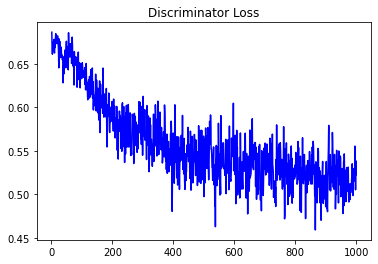

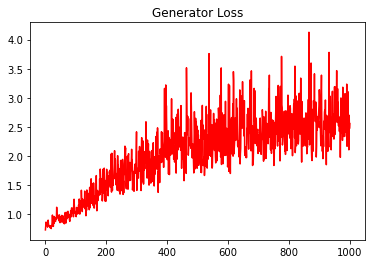

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.22500736547031386


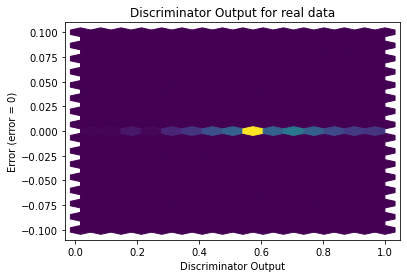

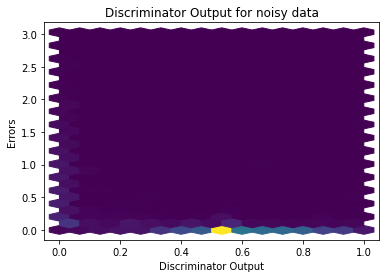

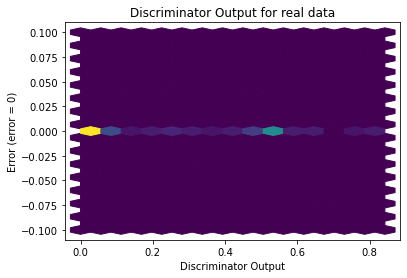

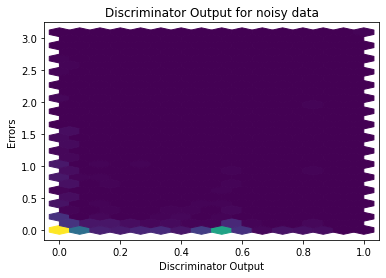

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())